# 1. Analyse exploratoire du dataset

## Objectif :
- Comprendre du mieux possible nos données 
- Utiliser différentes techniques d'analyse de données et machine learning pour faire la segmentation de clients.

## Checklist de base
#### Analyse de Forme :
- **variable target** : 
- **lignes et colonnes** : 2240, 29
- **types de variables** : Entier :25, Object :3, Float : 1 
- **Analyse des valeurs manquantes** : 
    - Peu de valeurs manquantes. 
    - Seulement 1 variable1 comportent des valeurs manquantes.


In [1]:
# Importations des bibliothèques

import warnings
warnings.filterwarnings('ignore')

# Bibliothèques pour aider à la lecture et à la manipulation des données 
import pandas as pd
import numpy as np

# Bibliothèques pour aider à la visualisation des données
import seaborn as sns
import matplotlib.pyplot as plt

import datetime
from datetime import date

from sklearn.preprocessing import RobustScaler, normalize

In [2]:
# Affichage des différentes variables en entier

pd.set_option('display.max_row',100)
pd.set_option('display.max_column',81)

In [3]:
# Importatons notre jeu de données

missing_values = ["n/a", "NaN", "--"]
df = pd.read_csv('segmentation.csv', sep='\t', na_values = missing_values)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [4]:
# Vérifions les dimensions 
df.shape

(2240, 29)

In [5]:
#Affichons les différentes colonnes du dataset
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [6]:
# Déterminons les différentes types des variables que nous avons
df.dtypes.value_counts()

int64      25
object      3
float64     1
dtype: int64

In [7]:
# Vérification des valeurs manquantes 
# Pourcentage des valeurs manquantes par ordre coissant (division des valeurs manquantes par la dimension du df et organisation ascendente de celles ci)
(df.isna().sum()/df.shape[0]).sort_values(ascending=False)

Income                 0.010714
Response               0.000000
MntSweetProducts       0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntGoldProds           0.000000
Z_Revenue              0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
ID                     0.000000
dtype: float64

In [8]:
# Supprimons les valeurs manquantes, puisqu'il y en a pas assez
df = df.dropna(subset=['Income'] ,axis=0)

In [9]:
#Regardons à nouveau notre dataset
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [10]:
# Plus de valeur manquante ! La présence de valeur manquante, pourrais 

In [11]:
# Affichons la distribution de notre dataset
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [12]:
# La description 

In [13]:
# Copie du dataset
Data = df.copy()

In [14]:
# Supprimons la variable ID car elle ne nous servira pas dans notre analyse.
Data = Data.drop('ID',axis=1)
Data

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


### Visualisation des différentes variables

#### Visualisons la variable 'Education'

Text(0.5, 1.0, "Diagramme du Niveau d'éducation")

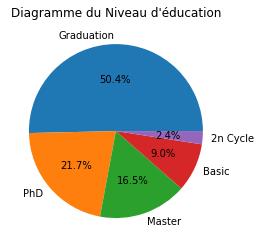

In [17]:
# Visualisons la variable 'Education'
plt.figure()
plt.pie(Data['Education'].value_counts(), labels=Data['Education'].unique(), autopct='%.1f%%')
plt.title("Diagramme du Niveau d'éducation" )

#### En regardant de plus prêt on peut, pour un soucis de compréhension, regrouper les niveaux d'éducation en deux catégories:
* Basic, 2n Cycle => Pour les clients moins diplomés
* Graduation, PhD, Master => Pour les clients diplomés

In [18]:
# Remplaçons les deux catégories dans la variable 'Education'
Data['Education']= Data['Education'].replace({'Basic':'Undergraduate','2n Cycle':'Undergraduate','Graduation':'Postgraduate','Master':'Postgraduate','PhD':'Postgraduate'})

([<matplotlib.patches.Wedge at 0x1c8e8900a90>,
 [Text(-1.0294507535624926, 0.38759662793891325, 'Undergraduate'),
  Text(1.029450771707199, -0.38759657974684514, 'Postgraduate')],
 [Text(-0.5615185928522686, 0.21141634251213448, '88.54%'),
  Text(0.5615186027493813, -0.21141631622555188, '11.46%')])

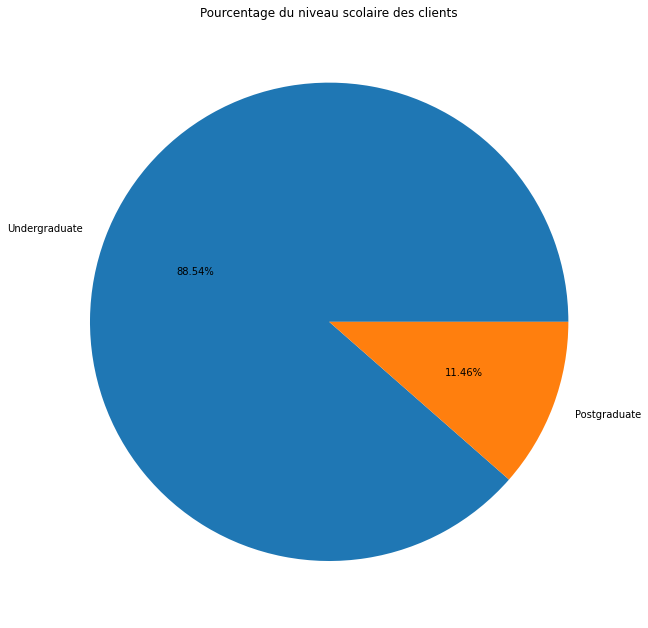

In [19]:
#Visualisons la variable Education
count = pd.value_counts(Data['Education']).tolist()
plt.figure(figsize=(4,4))
plt.title("Pourcentage du niveau scolaire des clients")
plt.pie(x=count,labels=["Undergraduate","Postgraduate"],autopct='%.2f%%')

In [20]:
#### Nous remarquons qu'il y a plus de client (88,54%) qui ont fait le premier cycle universiatire et 11, 46% ont un niveau plus élévé

#### Analysons la variable Marital_Status

Text(0.5, 1.0, 'Diagramme de la Situation Matrimoniale')

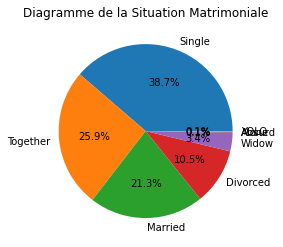

In [21]:
# Visualisons la variable 'Marital_status'
plt.figure()
plt.pie(Data['Marital_Status'].value_counts(), labels=Data['Marital_Status'].unique(), autopct='%.1f%%')
plt.title("Diagramme de la Situation Matrimoniale" )

In [22]:
# Il ya des catégories qui ne sont pas très visibles. Affichons alors les différentes catégories de la variable
Data['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

#### Nous remarquons ici que :
* il y a 8 catégories dans la variable 'Marital_status' 
* Il y a 38% de client qui sont seuls

#### En regardant de plus prêt on peut regrouper la situation matrimoniale en deux catégorie. Puisse que:
* Together,Maried => Etre en couple
* Single, Divorced, Widow, Yolo, Alone, Absurd => Célibataire

In [23]:
# Remplaçons par ces catégories
Data['Marital_Status']=Data['Marital_Status'].replace({'Divorced':'Celib','Single':'Celib','Married':'En couple','Alone':'Celib','Together':'En couple','Absurd':'Celib','Widow':'Celib','YOLO':'Celib'})

Text(0.5, 1.0, 'Diagramme de la Situation Matrimoniale')

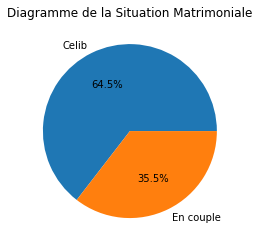

In [24]:
# Révisionnalisons notre dataset
plt.figure()
plt.pie(Data['Marital_Status'].value_counts(), labels=Data['Marital_Status'].unique(), autopct='%.1f%%')
plt.title("Diagramme de la Situation Matrimoniale" )

#### On en déduit alors qu'il y a 64,5 % de client qui sont célibataire contre 35,5% en couple

##### Analysons les variables Kidhome et TeenHomme

<AxesSubplot:xlabel='Kidhome', ylabel='Density'>

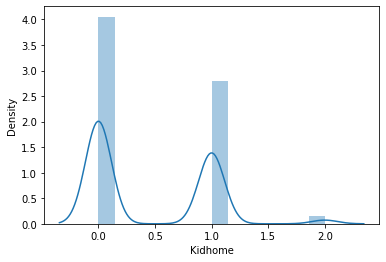

In [57]:
# Visualisation de la variable Kidhome
sns.distplot(Data['Kidhome'])

<AxesSubplot:xlabel='Teenhome', ylabel='Density'>

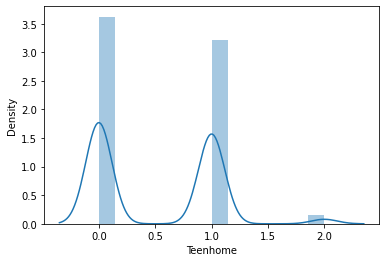

In [58]:
# Visualisation de la variable Kidhome
sns.distplot(Data['Teenhome'])

Nous remarquons la variable Teenhome et Kihome ont la meme distribution.

Pour une meilleur analyse, regroupons les variables Kidhome et TeenHome en une seule variable afin de déterminer le nombre d'enfant des clients

In [53]:
# Additions du nombre d'enfants et d'adoléscents dans le ménage du client
Data['Nbr_Enf']=Data['Kidhome']+Data['Teenhome']

In [54]:
# Nous pouvons simplifier la colonne en choix binaire
Data['Enfants'] = np.where(Data.Nbr_Enf> 0, 'enfant', 'Pas_d_enfant')

([<matplotlib.patches.Wedge at 0x1c8e9785dc0>,
 [Text(-0.6860128990602854, 0.859875748188599, 'enfant'),
  Text(0.6860128185529041, -0.8598758124177587, 'Pas_d_enfant')],
 [Text(-0.3741888540328829, 0.4690231353755994, '71.44%'),
  Text(0.3741888101197658, -0.46902317040968644, '28.56%')])

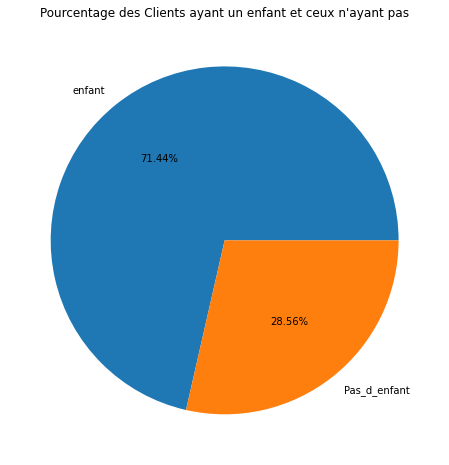

In [55]:
count = pd.value_counts(Data['Enfants']).tolist()
plt.figure(figsize=(8,8))
plt.title("Pourcentage des Clients ayant un enfant et ceux n'ayant pas")
plt.pie(x=count,labels=["enfant","Pas_d_enfant"],autopct='%.2f%%')

Nous remarquons qu'il y a 71,44 % de client qui ont des enfants contre 28,56% qui n'on en pas

#### Analysons la variable 'Income'

In [ ]:
# Histogrammes de la variable continue 'Income'
plt.figure()
sns.distplot(Data['Income'])

<AxesSubplot:>

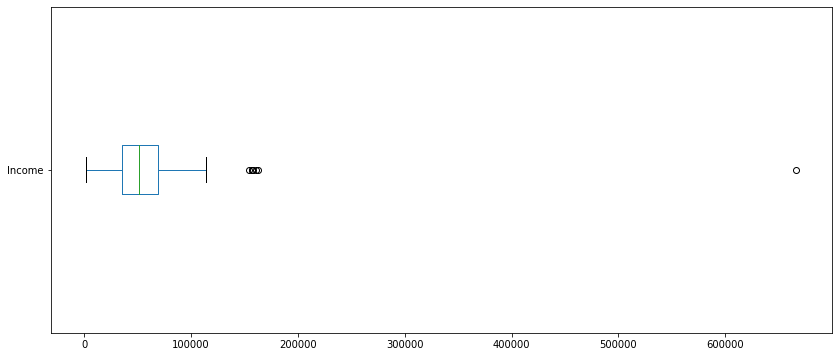

In [25]:
# Y a t'il des valeurs aberrentes dans 'Income' ?
Data['Income'].plot(kind='box', vert=False, figsize=(14,6))

In [26]:
##### On remarque qu'il y a une valeur aberrente Income > 600000

#### Analyse de la variable 'Year_Birth'

<AxesSubplot:xlabel='Year_Birth', ylabel='Density'>

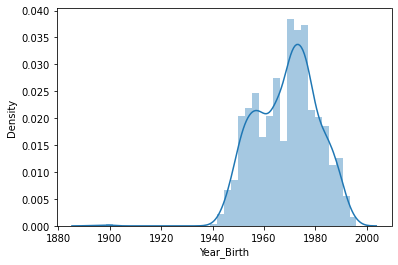

In [31]:
# Visualisons la variable 
sns.distplot(Data['Year_Birth'])

In [32]:
# Créons une colonne qui sera le calcul de l'age du client (dernière année du dataset-l'année de naissance du client)

Data['Age']=2014-Data['Year_Birth']

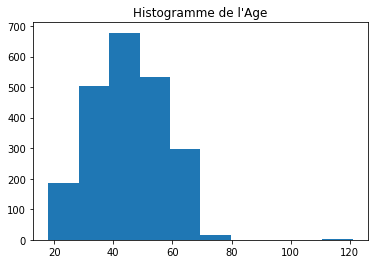

In [33]:
plt.hist(Data['Age'])
plt.title("Histogramme de l'Age")
plt.show()

In [ ]:
# Visualisons la distribution
sns.distplot(Data['Age'])

In [ ]:
# 
Data['Age'].plot(kind='box', vert=False, figsize=(14,6))

##### Pour faciliter notre analyse, catégorisons la variable 'Age'

In [40]:
# Fonction de catégorisation
def Age_Group(i):
    if i < 25:
        return 'Jeunes'
    elif 35 <= i <= 64:
        return'Adultes'
    elif 25 <= i <= 34:
        return'Jeunes_Ad' # Jeune Adulte
    elif i > 64:
        return'Seniors'
Age_Group(33)

'Jeunes_Ad'

In [42]:
Data['Age_Group'] = Data['Age'].map(Age_Group)

In [43]:
Data

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Age_Group
0,1957,Postgraduate,Celib,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,57,Adultes
1,1954,Postgraduate,Celib,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,60,Adultes
2,1965,Postgraduate,En couple,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,49,Adultes
3,1984,Postgraduate,En couple,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,30,Jeunes_Ad
4,1981,Postgraduate,En couple,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,33,Jeunes_Ad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Postgraduate,En couple,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,47,Adultes
2236,1946,Postgraduate,En couple,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,68,Seniors
2237,1981,Postgraduate,Celib,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,33,Jeunes_Ad
2238,1956,Postgraduate,En couple,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,58,Adultes


##### Visualisons les variables 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds' 

In [59]:
#Renommons les différentes variables
Data = Data.rename(columns={'MntWines': "Vins",'MntFruits':'Fruits','MntMeatProducts':'Viande','MntFishProducts':'Poisson','MntSweetProducts':'Sucreries','MntGoldProds':'Or'})

In [47]:
boxplot_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

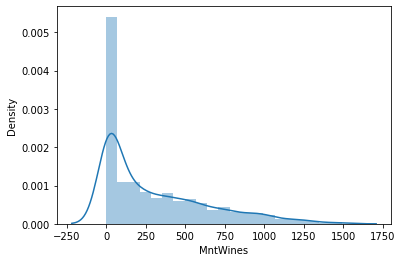

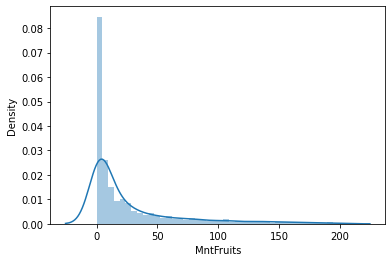

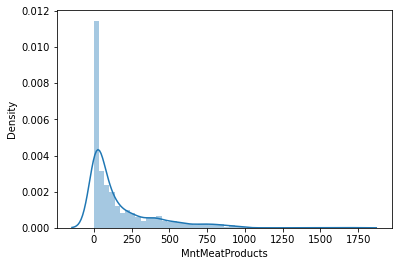

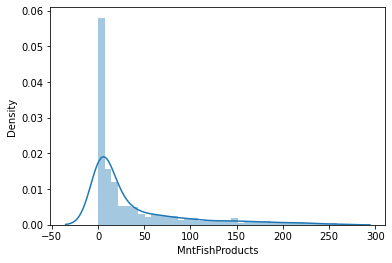

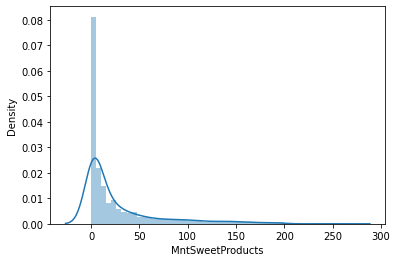

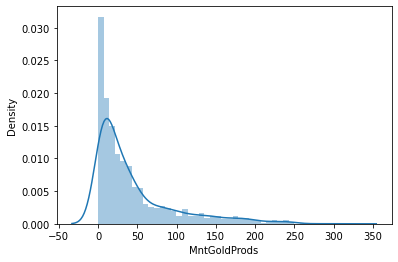

In [48]:
for col in boxplot_cols:
    plt.figure()
    sns.distplot(Data[col])

On remarque que les variables 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds' ont pratiquement la meme distribution.
Regroupons ses variables en une seule afin d'avoir le montant total des dépenses du client

In [49]:
# La somme des dépenses des clients
Data['Depenses']=Data['MntWines']+Data['MntFruits']+Data['MntMeatProducts']+Data['MntFishProducts']+Data['MntSweetProducts']+Data['MntGoldProds']

<AxesSubplot:xlabel='Depenses', ylabel='Density'>

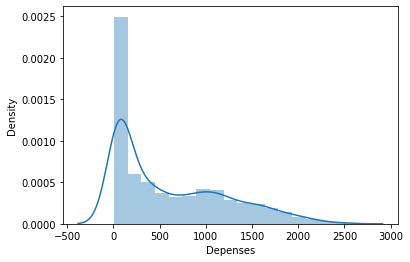

In [50]:
# Vérifions si la variable a gardé la meme distribution
plt.figure()
sns.distplot(Data['Depenses'])

Pour notre analyse, déterminons l'ancienneté du client dans l'entreprise

In [61]:
# Calculons l'ancienneté du client
Fin_Date = date(2014,10,4)

Data['Anciennete'] = pd.to_datetime(Data['Dt_Customer'], dayfirst=True,format = '%d-%m-%Y')
Data['Anciennete'] = pd.to_numeric(Data['Anciennete'].dt.date.apply(lambda x: (Fin_Date - x)).dt.days, downcast='integer')/30

In [62]:
Data['Anciennete']

0       25.333333
1        7.000000
2       13.633333
3        7.866667
4        8.600000
          ...    
2235    15.933333
2236     3.866667
2237     8.400000
2238     8.433333
2239    23.966667
Name: Anciennete, Length: 2216, dtype: float64

##### Renommons les variables des achats effectués par le client

In [64]:
Data = Data.rename(columns={'NumWebPurchases': "Web",'NumCatalogPurchases':'Catalogue','NumStorePurchases':'Magasin'})

#### Visualisons la distribution des achats effectuées avec une remise

In [69]:
boxplot_rem = ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response','Complain','Z_Revenue','Z_CostContact']

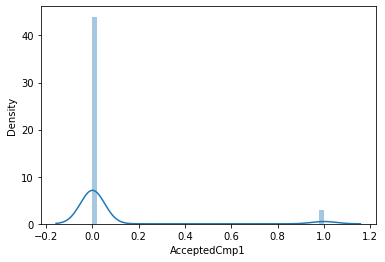

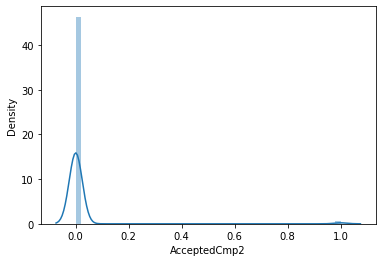

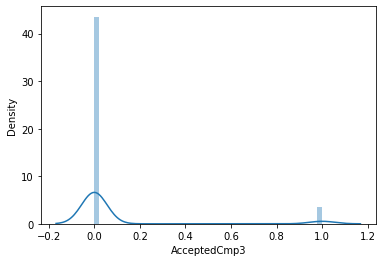

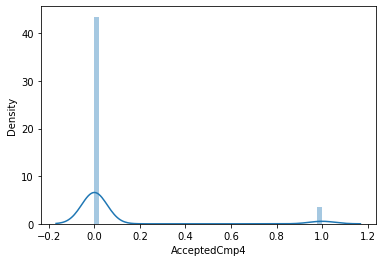

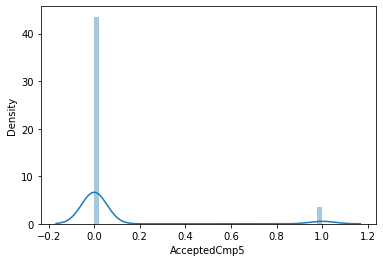

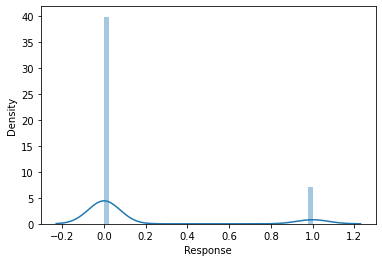

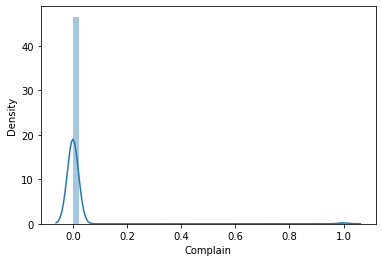

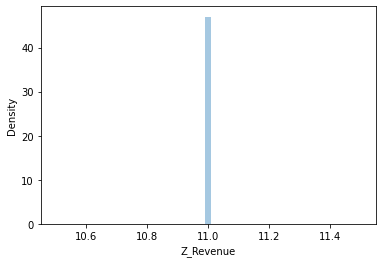

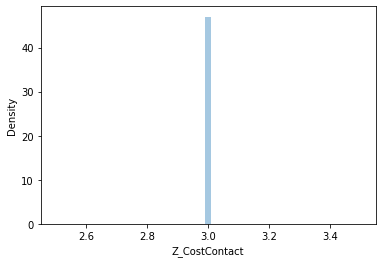

In [70]:
for col in boxplot_rem:
    plt.figure()
    sns.distplot(Data[col])

Les variables des achats effectuées avec remise ont la meme distribution.
Mais nous n'utiliserons pas ses variables.

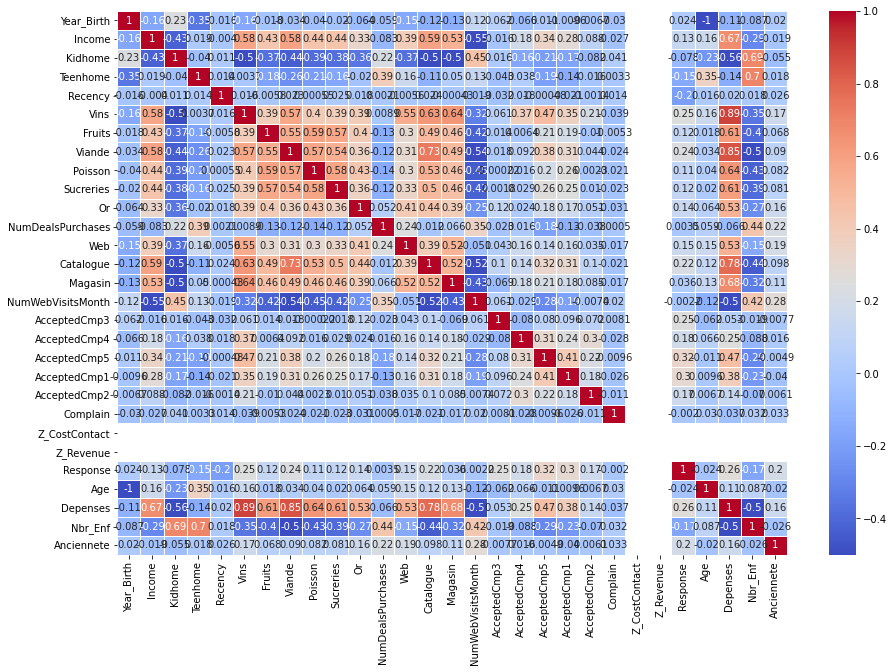

In [71]:
# Affichons la corrélation entre les variables
corr= Data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot= True,vmin=-0.5,vmax=1, cmap='coolwarm',linewidths=0.75)
plt.show()

<AxesSubplot:xlabel='Depenses', ylabel='Age_Group'>

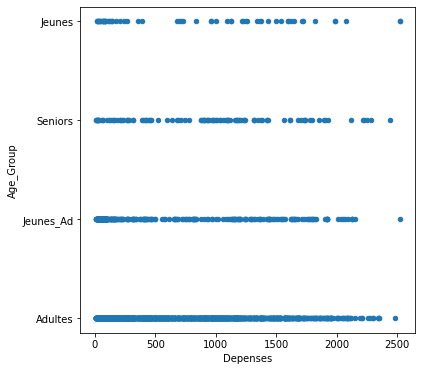

In [74]:
#### Quel est la catégorie de client qui dépense le plus ?
Data.plot(kind='scatter', x='Depenses', y='Age_Group', figsize=(6,6))

<AxesSubplot:xlabel='Depenses', ylabel='Income'>

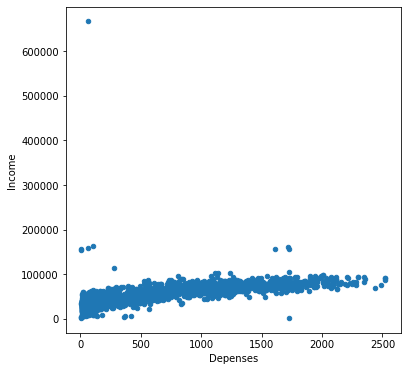

In [78]:
Data.plot(kind='scatter', x='Depenses', y='Income', figsize=(6,6))

<AxesSubplot:xlabel='Marital_Status', ylabel='Age'>

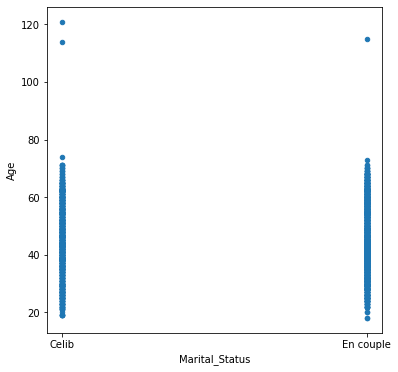

In [85]:
Data.plot(kind='scatter', x='Marital_Status', y='Age', figsize=(6,6))

<AxesSubplot:xlabel='Education', ylabel='Age'>

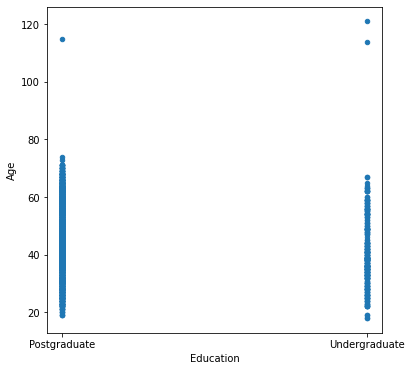

In [86]:
Data.plot(kind='scatter', x='Education', y='Age', figsize=(6,6))

<AxesSubplot:xlabel='Education', ylabel='Age'>

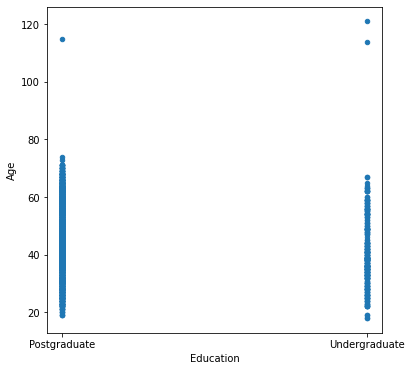

In [84]:
Data.plot(kind='scatter', x='Education', y='Age', figsize=(6,6))

<AxesSubplot:xlabel='Nbr_Enf', ylabel='Age'>

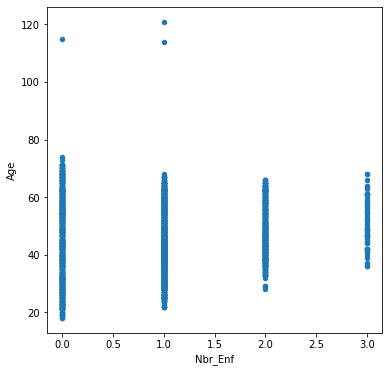

In [90]:
Data.plot(kind='scatter', x='Nbr_Enf', y='Age', figsize=(6,6))

<AxesSubplot:xlabel='Enfants', ylabel='Age'>

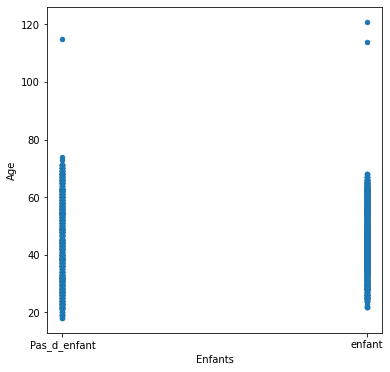

In [93]:
Data.plot(kind='scatter', x='Enfants', y='Age', figsize=(6,6))

<AxesSubplot:xlabel='Depenses', ylabel='Vins'>

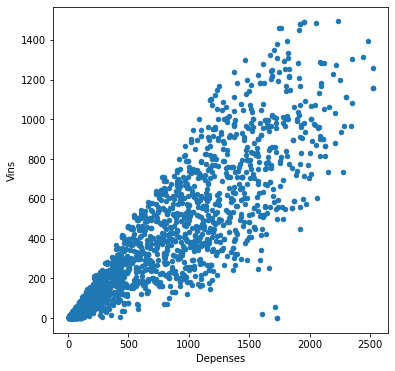

In [94]:
Data.plot(kind='scatter', x='Depenses', y='Vins', figsize=(6,6))

<AxesSubplot:xlabel='Depenses', ylabel='Fruits'>

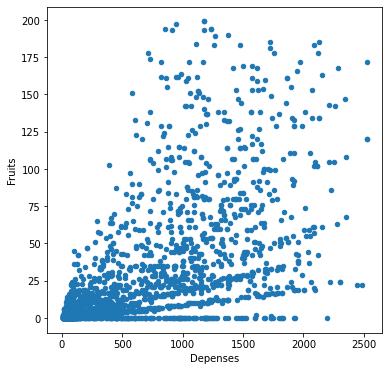

In [95]:
Data.plot(kind='scatter', x='Depenses', y='Fruits', figsize=(6,6))

<AxesSubplot:xlabel='Depenses', ylabel='Viande'>

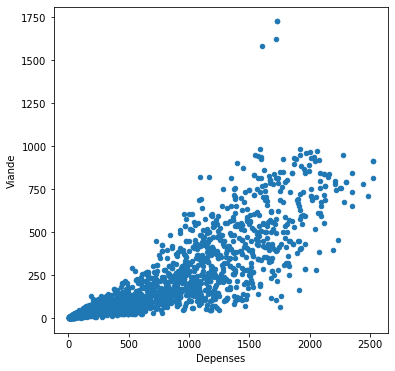

In [97]:
Data.plot(kind='scatter', x='Depenses', y='Viande', figsize=(6,6))

<AxesSubplot:xlabel='Depenses', ylabel='Sucreries'>

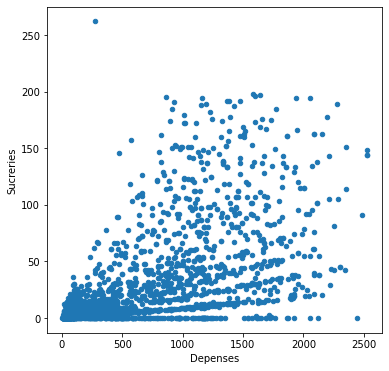

In [98]:
Data.plot(kind='scatter', x='Depenses', y='Sucreries', figsize=(6,6))

<AxesSubplot:xlabel='Depenses', ylabel='Or'>

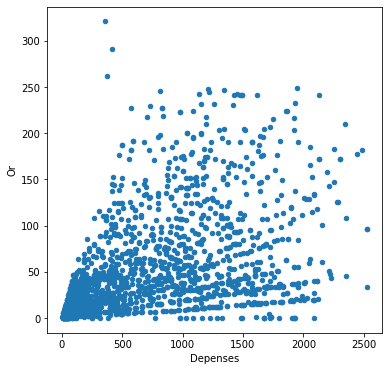

In [99]:
Data.plot(kind='scatter', x='Depenses', y='Or', figsize=(6,6))

In [119]:
# Après analyse, affichons notre nouveau dataset

Dataframes = Data[['Age_Group','Education','Marital_Status','Income','Depenses','Anciennete','Enfants','Nbr_Enf','Vins','Fruits','Viande','Poisson','Sucreries','Or']]
Dataframes.head()

,Age_Group,Education,Marital_Status,Income,Depenses,Anciennete,Enfants,Nbr_Enf,Vins,Fruits,Viande,Poisson,Sucreries,Or
0,Adultes,Postgraduate,Celib,58138.0,1617,25.333333,Pas_d_enfant,0,635,88,546,172,88,88
1,Adultes,Postgraduate,Celib,46344.0,27,7.000000,enfant,2,11,1,6,2,1,6
2,Adultes,Postgraduate,En couple,71613.0,776,13.633333,Pas_d_enfant,0,426,49,127,111,21,42
3,Jeunes_Ad,Postgraduate,En couple,26646.0,53,7.866667,enfant,1,11,4,20,10,3,5
4,Jeunes_Ad,Postgraduate,En couple,58293.0,422,8.600000,enfant,1,173,43,118,46,27,15


#### Vérifions l'existence des outliers

In [116]:
X_num = Data.select_dtypes(exclude=object)

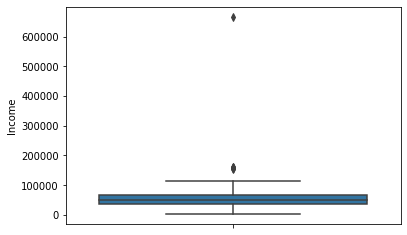

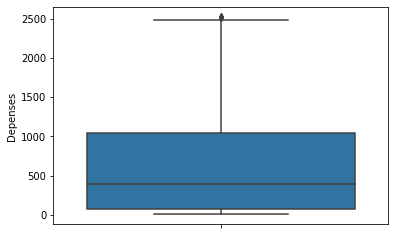

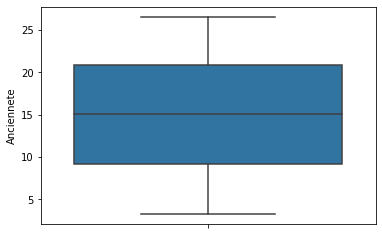

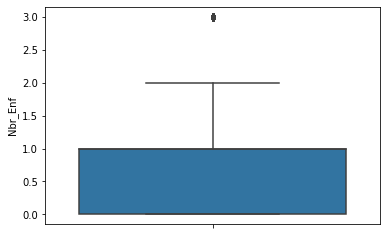

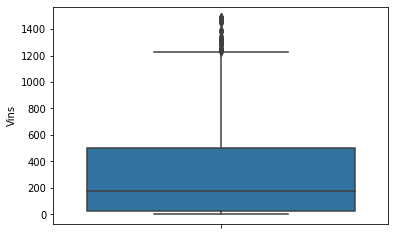

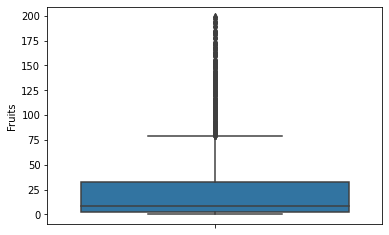

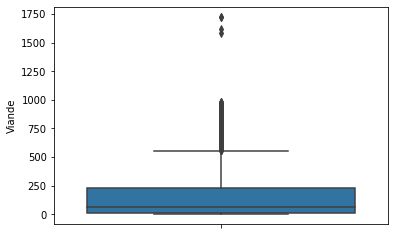

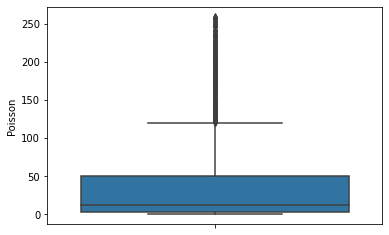

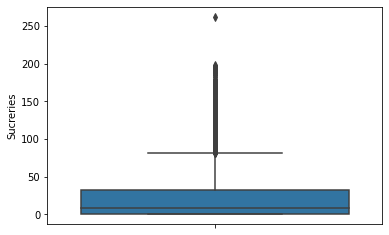

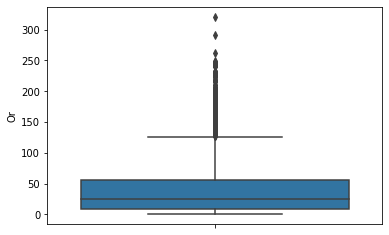

In [117]:
# Y a t'il des valeurs aberrantes ? Vérifions cela
for i in X_num:
    sns.boxplot(y=X_num[f"{i}"], data=X_num)
    plt.show()

### Fesons un regroupement des différents types de clients
#### Définisons 4 types de clients
* Etoilé : Ancien client avec des revenus élévés et des dépenses élévées
* Besoin attention: Nouveau client avec des revenus inferieurs à la moyen et de faible depenses
* Bon Potentiel : Nouveau client avec des revenus élevéz et des dépenses élevés
* Faible client : Ancien client avec des revenus inférieurs à la moyen et une nature peu dépensière

# Preprocessing

In [120]:
Dataframes.columns

Index(['Age_Group', 'Education', 'Marital_Status', 'Income', 'Depenses',
       'Anciennete', 'Enfants', 'Nbr_Enf', 'Vins', 'Fruits', 'Viande',
       'Poisson', 'Sucreries', 'Or'],
      dtype='object')

In [121]:
# Affichage des variables categorielles et de leurs modalités
for col in Dataframes.select_dtypes("object"):
    print(col, Data[col].unique())

Age_Group ['Adultes' 'Jeunes_Ad' 'Seniors' 'Jeunes']
Education ['Postgraduate' 'Undergraduate']
Marital_Status ['Celib' 'En couple']
Enfants ['Pas_d_enfant' 'enfant']


In [122]:
X_obj = Dataframes.select_dtypes(object)

In [ ]:
# Encodage des variables qualitatives
def encodage(Data):
    Encoder = {
        'Celib': 0,
        'En couple':1,
        'Postgraduate':1,
        'Undergraduate':0,
        'enfant':1,
        'Pas_d_enfant':0,
        'Adulte':0,
    }
    for col in Data.select_dtypes("object").columns:
        Data[col] = Data[col].map(Encoder)
    
    return Data

In [ ]:
#Data = encodage(Data)
#Data

In [ ]:
lab_make = LabelEncoder()

for i in X_obj:
    X_obj[i] = lab_make.fit_transform(X_obj[i])

In [ ]:
# Normalisons nos données 
Rs = RobustScaler()
Normalize = Rs.fit_transform()
dataset = Data[['Income','Anciennete','Depenses']]
X_std = scaler.fit_transform(dataset)
X = normalize(X_std,norm='l2')

In [ ]:
dataset = dataset.replace({0:'Etoilé',1:'Besoin attention',2:'Bon potentiel',3:'Faible client'})

In [ ]:
dataset

In [ ]:
Data